# La régression logistique

## Pourquoi la régression logistique ?

La régression logistique est un __modèle linéaire généralisé__ qui permet de répondre au cas où la variable dépendante (celle qu'on cherche à expliquer) est qualitative. Les variables explicatives (ou indépendantes) peuvent être quantitative ou qualitative.  
Il existe trois types de régressions logistiques :
- la régression logistique ordinaire ou régression logistique binaire lorsque la variable d’intérêt est binaire (oui/non, vrai/faux)
- la régression logistique multinomiale qui est une extension aux variables qualitatives à trois modalités ou plus
- la régression logistique ordinale qui correspond au cas où la variable qualitative au moins 3 modalités ordonnées hiérarchiquement

Exemples de problèmes :
- déterminer si un objet est défectueux en fonction par exemple du matériau utilisé, de la température de fabrication, de l'humidité, etc...
- déterminer si un client a cliqué sur l'offre promotionnelle contenue dans un email selon différentes caractéristiques individuelles (âge, sexe, urbain/rural, etc...).Plus généralement les problèmes de segmentation de clients
- déterminer si un email est un SPAM ou non
- en médicine : déterminer si une tumeur est maligne/bénine, si un médicament permet la guérison ou non, etc...

$\Rightarrow$ ce sont des problèmes de __classification__

## Intuition de la régression logistique

### Importer et afficher les données email_offer.csv

In [1]:
import pandas as pd
data = pd.read_csv('Data/email_offer.csv')
data

,Age,Gender,TookAction
0,38,Female,0
1,32,Female,0
2,46,Male,1
3,34,Male,0
4,40,Male,0
...,...,...,...
95,31,Male,0
96,49,Male,1
97,36,Male,0
98,32,Female,0


### Tracer le scatter plot de y (TookAction) en fonction de x (Age)

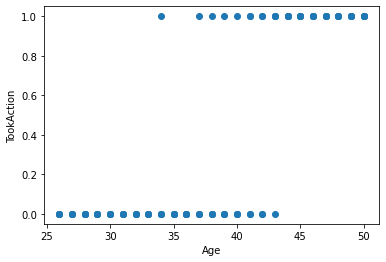

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data['Age'], data['TookAction'])
ax.set_xlabel('Age')
ax.set_ylabel('TookAction')
plt.show()

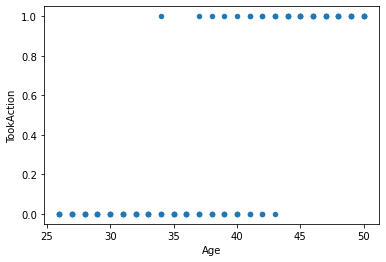

In [3]:
# ou autrement: la méthode plot des dataframe
data.plot(x='Age', y='TookAction', kind='scatter');

### Entrainer un modèle de régression linéaire et afficher la droite de régression sur le scatter plot

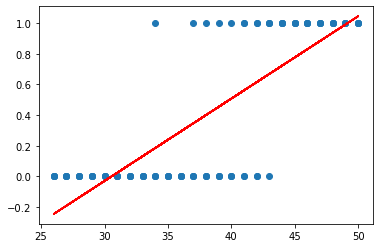

In [4]:
# Les données
x=data[['Age']]
y=data[['TookAction']]

# Le modèle
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(x,y)

# Visualisation
plt.scatter(x,y)
plt.plot(x, reglin.predict(x), c='r')
plt.show()

### Coder la fonction sigmoïde et afficher son graphe

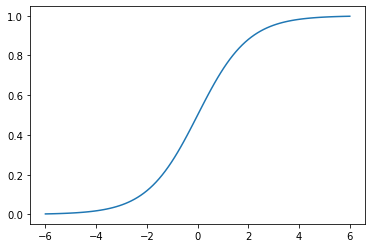

In [5]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

x_values = np.linspace(-6, 6, 100)

plt.plot(x_values, sigmoid(x_values));

## Une première régression logistique

### Construire un premier modèle de régression logistique avec uniquement l'âge comme variable explicative

In [6]:
# Les données
x=data[['Age']]
y=data['TookAction']

# Modèle de régression logistique
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression()
reglog.fit(x,y)

# Prédictions
y_pred = reglog.predict(x)
prob_pred = reglog.predict_proba(x)

### Afficher sur un même graphique, le scatter plot, la droite de régression et les probabilités

In [7]:
x.sort_values(by='Age')

,Age
49,26
74,26
91,26
51,26
24,27
...,...
85,49
14,50
39,50
26,50


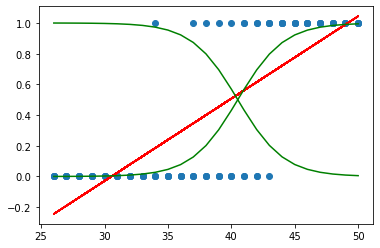

In [8]:
plt.scatter(x,y)
plt.plot(x, reglin.predict(x),c='r')
plt.plot(np.hstack((x.sort_values(by='Age'),x.sort_values(by='Age'))),
         reglog.predict_proba(x.sort_values(by='Age')), c='g');

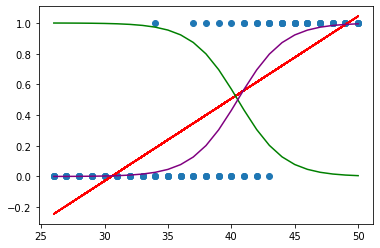

In [9]:
plt.scatter(x,y)
plt.plot(x, reglin.predict(x),c='r')
plt.plot(x.sort_values(by='Age'), reglog.predict_proba(x.sort_values(by='Age'))[:,0], c='g')
plt.plot(x.sort_values(by='Age'), reglog.predict_proba(x.sort_values(by='Age'))[:,1], c='purple');

### Construire un second modèle de régression logistique avec cette fois l'âge et le genre comme variables explicatives et visualiser sur les résultats sur le même graphique que précédemment

In [25]:
X = data[['Age','Gender']]
y = data['TookAction']

# Variable Genre catégorique
dummies = pd.get_dummies(X.Gender, drop_first=True)
X = pd.concat([X,dummies], axis=1)
X.drop(['Gender'],inplace=True,axis=1)

# Modèle de régression logistique sur le training set
from sklearn.linear_model import LogisticRegression
reglog2 = LogisticRegression(penalty ='none', random_state = 0)
reglog2.fit(X, y)

# Prédictions
y_pred2 = reglog2.predict(X)
prob_pred2 = reglog2.predict_proba(X)

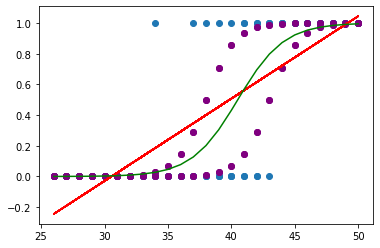

In [26]:
# Visualisation
plt.scatter(x,y)
plt.plot(x, reglin.predict(x),c='r')
plt.plot(x.sort_values(by='Age'), reglog.predict_proba(x.sort_values(by='Age'))[:,1], c='g')
plt.scatter(x.sort_values(by='Age'), reglog2.predict_proba(X.sort_values(by='Age'))[:,1], c='purple');

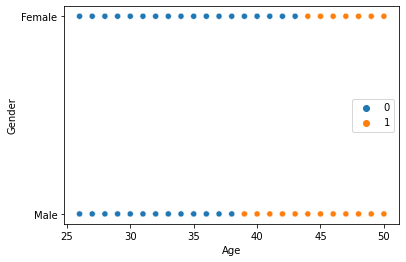

In [27]:
import seaborn as sns
sns.scatterplot(x=data.Age, y=data.Gender, hue=reglog2.predict(X));

## Évaluation du modèle

### Matrice de confusion

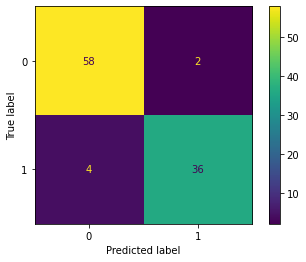

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y, reglog2.predict(X));

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred2)

array([[58,  2],
       [ 4, 36]])

In [34]:
# dans un tableau
pd.DataFrame(confusion_matrix(y, y_pred2),
             columns=[f'predit {k}' for k in reglog2.classes_],
             index = [f'vrai {k}' for k in reglog2.classes_])

,predit 0,predit 1
vrai 0,58,2
vrai 1,4,36


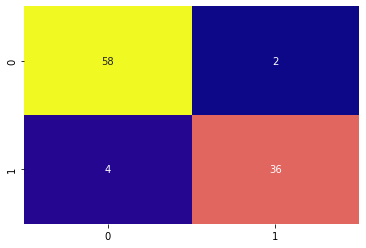

In [35]:
# avec un heatmap
sns.heatmap(confusion_matrix(y, y_pred2), annot=True, cmap="plasma", cbar=False);

### Affichage des probabilités

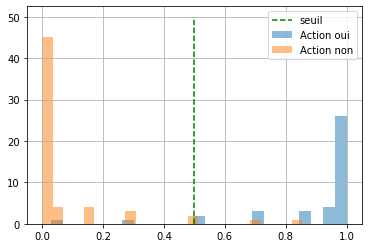

In [53]:
proba1 = reglog2.predict_proba(X)[:,1]
df = pd.DataFrame(proba1, columns=['proba'])
df['Action'] = y
#sns.histplot(data = df, x='proba', hue='Action', bins=25);
fig, ax = plt.subplots()
df.loc[df.Action==1, 'proba'].hist(bins=25, label='Action oui', alpha=0.5, ax=ax)
df.loc[df.Action==0, 'proba'].hist(bins=25, label='Action non', alpha=0.5, ax=ax)
ax.plot([0.5,0.5],[0,50], 'g--', label="seuil")
ax.legend();

### Courbe ROC et AUC

In [76]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
proba1 = reglog2.predict_proba(X)[:,1]
fpr, tpr, seuils = roc_curve(y, proba1, drop_intermediate=False)

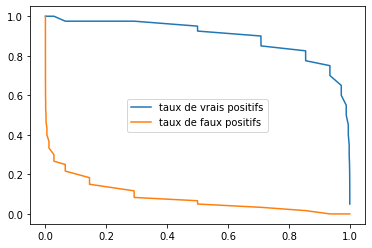

In [75]:
# Taux de faux/vrais positifs en fonction des différentes valeurs de seuil
plt.plot(seuils[1:], tpr[1:], label='taux de vrais positifs')
plt.plot(seuils[1:], fpr[1:], label='taux de faux positifs')
plt.legend();

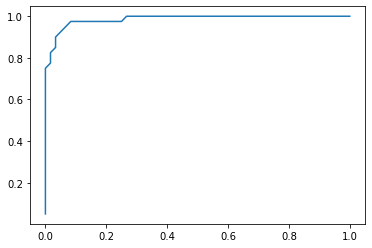

In [74]:
# Courbe ROC
plt.plot(fpr[1:], tpr[1:]);

In [78]:
# Mesure de l'aire sous la courbe ROC : AUC (area under curve)
score_auc = auc(fpr[1:], tpr[1:])
score_auc

0.9858333333333332

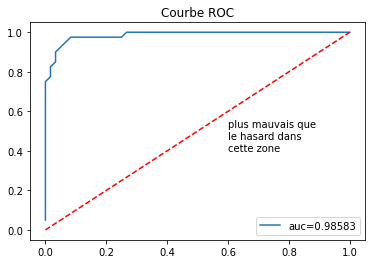

In [86]:
# Visualisation de la courbe ROC et de l'AUC
fig, ax = plt.subplots()
ax.plot(fpr[1:], tpr[1:], label='auc=%1.5f' %score_auc)
ax.plot([0,1], [0,1], 'r--')
ax.text(0.6, 0.4, "plus mauvais que \nle hasard dans \ncette zone")
ax.set_title("Courbe ROC")
ax.legend();

## Interprétation des coefficients